Confusion matrix, without normalization
[[17  0  2  1  0]
 [ 0 12  0  0  0]
 [ 0  1 26  0  0]
 [ 1  0  0 19  0]
 [ 0  0  0  0 25]]

Normalized confusion matrix
[[ 0.85  0.    0.1   0.05  0.  ]
 [ 0.    1.    0.    0.    0.  ]
 [ 0.    0.04  0.96  0.    0.  ]
 [ 0.05  0.    0.    0.95  0.  ]
 [ 0.    0.    0.    0.    1.  ]]


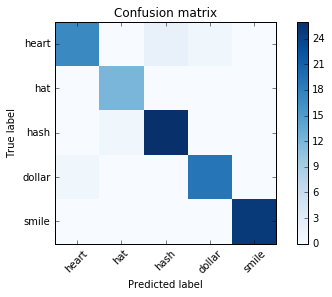

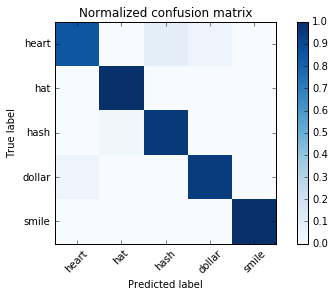

Confusion matrix, without normalization
[[20  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 20  0]
 [ 0  1  0  0 24]]

Normalized confusion matrix
[[ 1.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    0.    0.  ]
 [ 0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.    1.    0.  ]
 [ 0.    0.04  0.    0.    0.96]]


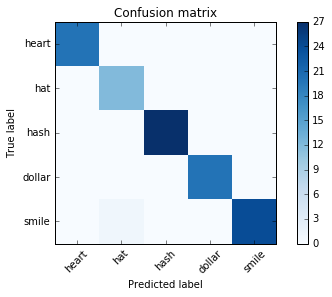

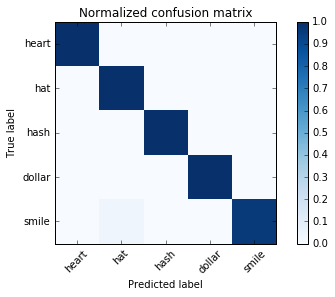

In [9]:
# Jeremy Aguillon
# CMSC 471
# Project 3
# Code that creates a confusion matrix based on the given data

# matplotlib imports
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# numpy import
import numpy as np
# scikitlearn imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, svm, metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
# pickle import
import pickle

## Constants ##
DATA = 0
LABELS = 1

# plot_confusion_matrix takes in a title and creates a visual of the confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    # names for the side labels
    names = ["Heart","Hat","Hash","Dollar","Smile"]
    # plots everything
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# sets up the confusion matrix based on classifier and training/test data
def make_confusion_matrix(classifier, X_train, X_test, y_train, y_test):
    # gets data
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    # computes confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm)

    # normalizes confusion matrix by row for clarity
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('\nNormalized confusion matrix')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

    plt.show()
    

# main function
def main():
    # gets the pickle data file and imports the data
    with open('data.pickle', 'rb') as myfile:
        pickleData = pickle.load(myfile)

    # retrieves the pickled data
    data = pickleData[DATA]
    labels = pickleData[LABELS]
    
    # stores the data for the matrix
    X = data
    y = labels
    
    # splits the data into a training and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
    
    # testing support vector machine
    classifier = svm.SVC(kernel='linear', gamma=0.001, C=100)
    
    make_confusion_matrix(classifier, X_train, X_test, y_train, y_test)

    # testing k nearest neighbor
    classifier = KNeighborsClassifier(n_neighbors=5)
    
    make_confusion_matrix(classifier, X_train, X_test, y_train, y_test)
    
main()